In [2]:
import pickle

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', title_fontsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16)

figsize=(10,4)

## MNIST MLP plots

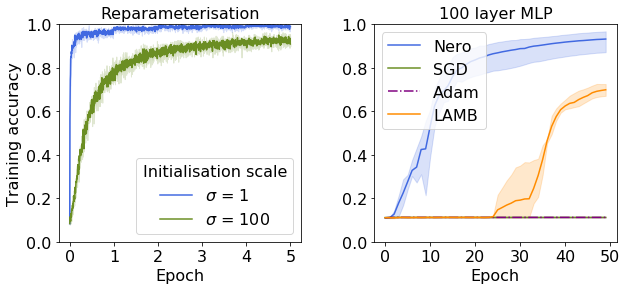

In [5]:
### 100 layer MLP

# lr_results = pickle.load( open( "results/100-layer-lr-search.p", "rb" ) )
# opt = 'nero'
# for key in lr_results.keys():
#     if key[0] == opt:
#         plt.plot(lr_results[key][0], label=key[1])
# plt.legend(title=opt)
# plt.show()

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize)
plt.subplots_adjust(wspace=0.3)
seed_results = pickle.load( open( "results/100-layer-3-seeds.p", "rb" ) )

opt_list = [('nero',0.001,'Nero'), ('sgd', 0.1, 'SGD'), ('adam',0.001,'Adam'), ('lamb',0.01,'LAMB') ]
color_list = ['royalblue', 'olivedrab', 'purple','darkorange']
dash_list = ['-','-','-.','-']
seed_list = [0,1,2]

for (opt, init_lr, name), color, dash in zip(opt_list,color_list,dash_list):
    accs = np.zeros((50,3))
    for idx,seed in enumerate(seed_list):
        train_acc, test_acc = seed_results[opt, init_lr, seed]
        accs[:,idx] = train_acc
    label = name
    mean = np.mean(accs,axis=1)    
    max = np.max(accs,axis=1)
    min = np.min(accs,axis=1)
    ax2.plot(mean, label=label, color=color, linestyle=dash)
    ax2.fill_between(x=range(len(mean)), y1=min, y2=max, alpha=0.2, color=color)
ax2.legend(loc=2)
ax2.set_ylim(0,1)
ax2.set_xlabel("Epoch")
ax2.set_xticks([0,10,20,30,40,50])
# ax2.set_yticklabels([])
ax2.set_title("100 layer MLP")

### Centred weight norm

results = pickle.load( open( "results/cwn_results.pickle", "rb" ) )

init_scale_list = [1,100]
seed_list = [0,1,2]

for idx, init_scale in enumerate(init_scale_list):
    color = color_list[idx]
    accs = np.zeros((1200,3))
    for idx,seed in enumerate(seed_list):
        accs[:,idx] = results[init_scale, seed]
    label = r'$\sigma$ = ' + str(init_scale)
    mean = np.mean(accs,axis=1)    
    max = np.max(accs,axis=1)
    min = np.min(accs,axis=1)
    ax1.plot(mean, label=label, color=color)
    ax1.fill_between(x=range(len(mean)), y1=min, y2=max, alpha=0.2, color=color)

ax1.set_xlabel('Epoch')
ax1.set_xticks([0,240,480,720,960,1200])
ax1.set_xticklabels([0,1,2,3,4,5])
ax1.set_ylabel('Training accuracy')
ax1.set_ylim(0,1)
ax1.legend(title='Initialisation scale')
ax1.set_title('Reparameterisation')

plt.savefig('figures/mnist.pdf', bbox_inches='tight')
plt.show()